In [1]:
# import zipfile

# # Download file zip của ảnh 10_food_classes 
# # Xem dữ liệu này được tại ra như thế nào - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# # Giải nén file đã the download
# zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


### 1. Tìm hiểu dữ liệu (trực quan hoá ....)

In [3]:
!tree 10_food_classes_all_data -d 

10_food_classes_all_data
├── test
│   ├── chicken_curry
│   ├── chicken_wings
│   ├── fried_rice
│   ├── grilled_salmon
│   ├── hamburger
│   ├── ice_cream
│   ├── pizza
│   ├── ramen
│   ├── steak
│   └── sushi
└── train
    ├── chicken_curry
    ├── chicken_wings
    ├── fried_rice
    ├── grilled_salmon
    ├── hamburger
    ├── ice_cream
    ├── pizza
    ├── ramen
    ├── steak
    └── sushi

22 directories


In [4]:
import os

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

all_classes = os.listdir(train_dir)
print("There are {} classes in the dataset".format(len(all_classes)))
print("="*50)
title = ['class', 'train', 'test']
print("{:<20} {:<20} {:<20}".format(*title))
print("-"*50)
total_train = 0
total_test = 0
for i in all_classes:
    print("{:<20} {:<20} {:<20}".format(i, len(os.listdir(train_dir+i)), len(os.listdir(test_dir+i))))
    total_test += len(os.listdir(test_dir+i))
    total_train += len(os.listdir(train_dir+i))
print("-"*50)
print("{:<20} {:<20} {:<20}".format("Total", total_train, total_test))
    

There are 10 classes in the dataset
class                train                test                
--------------------------------------------------
ice_cream            750                  250                 
chicken_curry        750                  250                 
steak                750                  250                 
sushi                750                  250                 
chicken_wings        750                  250                 
grilled_salmon       750                  250                 
hamburger            750                  250                 
pizza                750                  250                 
ramen                750                  250                 
fried_rice           750                  250                 
--------------------------------------------------
Total                7500                 2500                


In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image_path = random.sample(os.listdir(target_folder), 1)
    image = mpimg.imread(target_folder + "/" + random_image_path[0])
    
    plt.imshow(image)
    plt.title(f"{target_class} - {image.shape}")
    plt.axis("off")
    return image

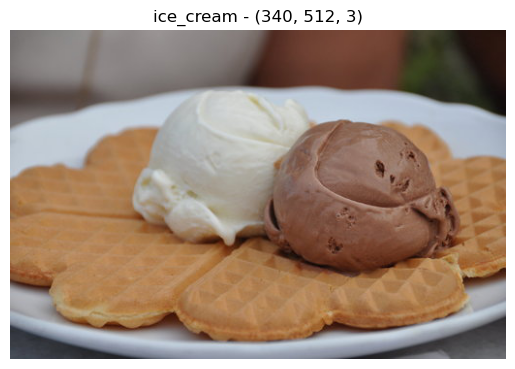

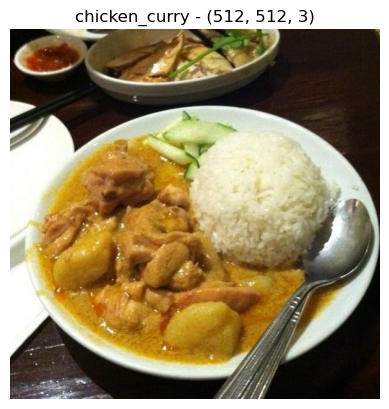

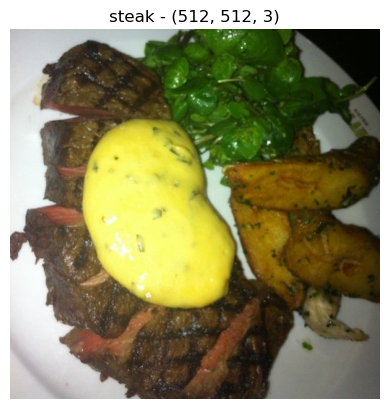

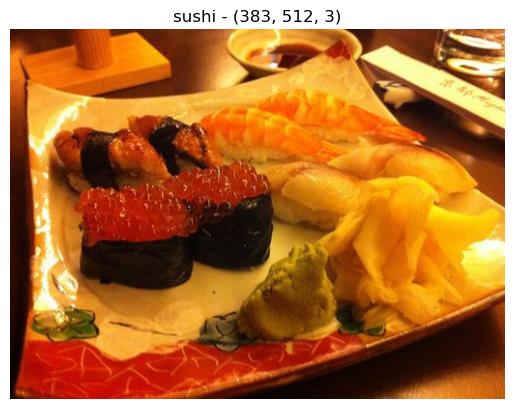

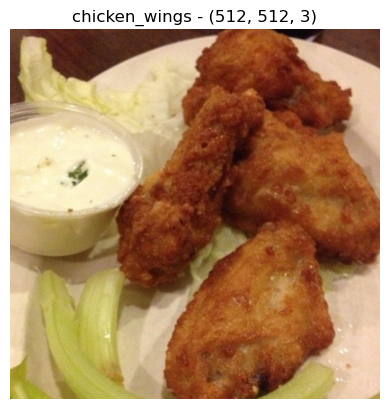

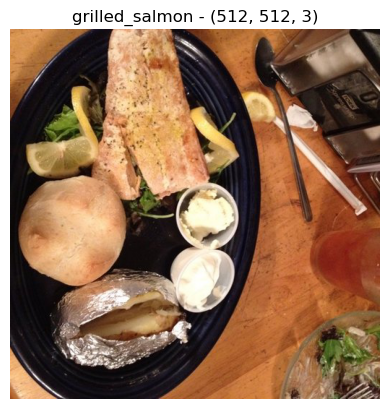

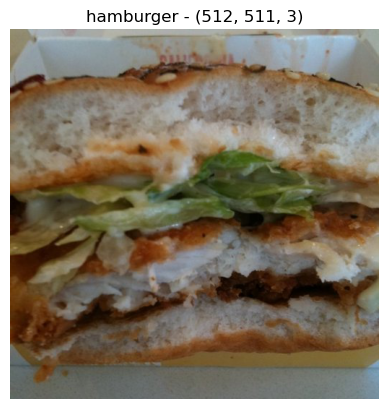

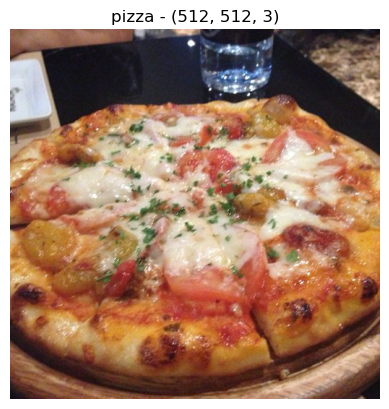

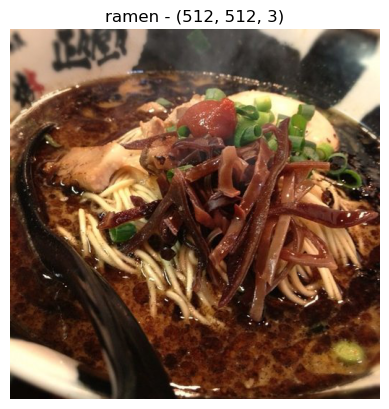

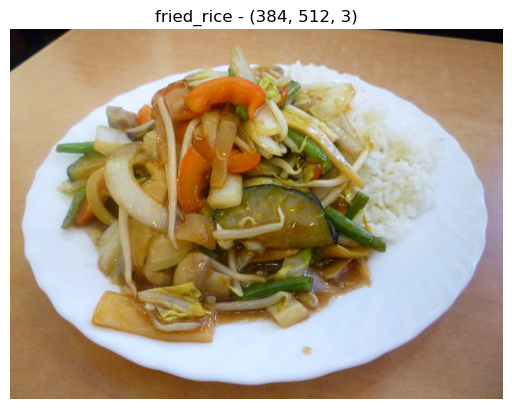

In [6]:
for i in all_classes:
    view_random_image(train_dir, i)
    plt.show()

### 2. Tiền xử lý dữ liệu (chuẩn bị cho mô hình)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_gen.flow_from_directory(train_dir,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode="categorical")
val_data = test_gen.flow_from_directory(test_dir,
                                        batch_size=32,
                                        target_size=(224, 224),
                                        class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


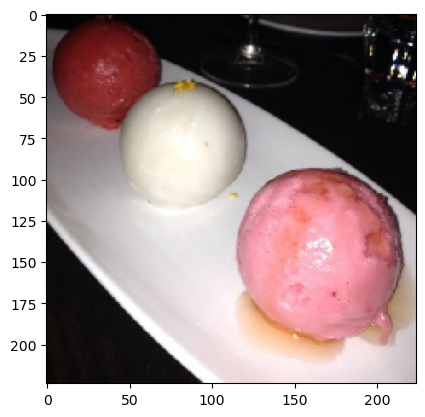

In [8]:
image, label = train_data.next()
plt.imshow(image[0])

### 3. Tạo mô hình (bắt đầu với baseline)

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

2022-10-14 14:43:32.935588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 4. Khớp mô hình

In [10]:
history_1 = model_1.fit(train_data, 
            epochs=5, 
            steps_per_epoch=len(train_data), 
            validation_data=val_data, 
            validation_steps=len(val_data))

Epoch 1/5
235/235 [==============================] - 299s 1s/step - loss: 3.8610 - accuracy: 0.1252 - val_loss: 2.2777 - val_accuracy: 0.1396
Epoch 2/5
235/235 [==============================] - 287s 1s/step - loss: 1.7630 - accuracy: 0.4195 - val_loss: 2.4500 - val_accuracy: 0.1912
Epoch 3/5
235/235 [==============================] - 340s 1s/step - loss: 0.4913 - accuracy: 0.8608 - val_loss: 3.4473 - val_accuracy: 0.1864
Epoch 4/5
235/235 [==============================] - 285s 1s/step - loss: 0.0747 - accuracy: 0.9865 - val_loss: 4.5259 - val_accuracy: 0.1860
Epoch 5/5
235/235 [==============================] - 283s 1s/step - loss: 0.0295 - accuracy: 0.9964 - val_loss: 5.2481 - val_accuracy: 0.1836


### 5. Đánh gía mô hình

In [11]:
def plot_history(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    epochs = range(len(history.history["accuracy"]))
    
    plt.plot(epochs, acc, label="Training accuracy")
    plt.plot(epochs, val_acc, label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()

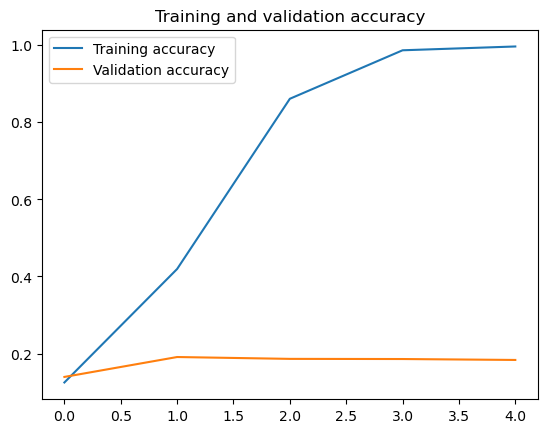

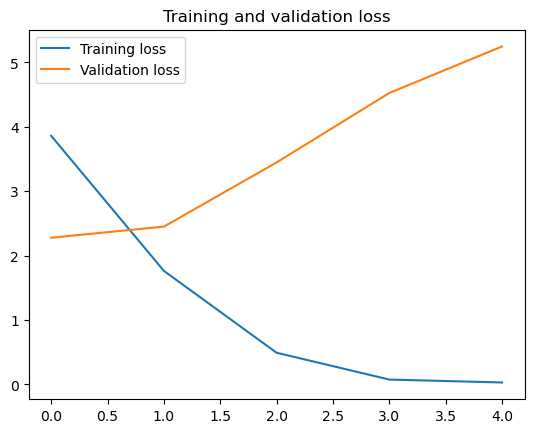

In [12]:
plot_history(history_1)

**=> Mô hình overfit**

### 6. Điều chỉnh các tham số khác nhau để cải thiện mô hình (vượt baseline)

Do chưa học transfer learning, nên đối với bài toán về overfit chúng ta sẽ thử update bằng 2 cách sau:
- Thêm maxpool
- Thêm maxpool + augmentation

In [13]:
from tensorflow.keras.layers import MaxPooling2D

model2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [14]:
model2.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
history_2 = model2.fit(train_data, 
                       epochs=5, 
                       steps_per_epoch=len(train_data), 
                       validation_data=val_data, 
                       validation_steps=len(val_data))


Epoch 1/5
235/235 [==============================] - 183s 776ms/step - loss: 2.1452 - accuracy: 0.2207 - val_loss: 2.0022 - val_accuracy: 0.2748
Epoch 2/5
235/235 [==============================] - 183s 780ms/step - loss: 1.8683 - accuracy: 0.3475 - val_loss: 1.9508 - val_accuracy: 0.3240
Epoch 3/5
235/235 [==============================] - 199s 847ms/step - loss: 1.6021 - accuracy: 0.4523 - val_loss: 1.7417 - val_accuracy: 0.4040
Epoch 4/5
235/235 [==============================] - 188s 801ms/step - loss: 1.1829 - accuracy: 0.6005 - val_loss: 1.8783 - val_accuracy: 0.3768
Epoch 5/5
235/235 [==============================] - 172s 733ms/step - loss: 0.6402 - accuracy: 0.7877 - val_loss: 2.3854 - val_accuracy: 0.3876


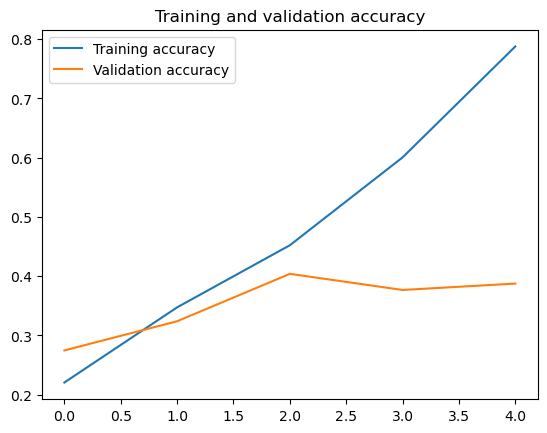

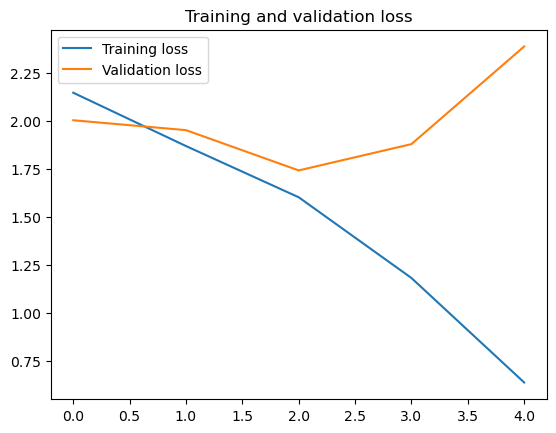

In [15]:
plot_history(history_2)

Data augmentaiton

In [16]:
# Tạo ImageDataGenerator training instance với data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # xoay hình một chút trong khoảng 0-20 độ (lưu ý: đây là int, không phải float)
                                             shear_range=0.2, # cắt ảnh
                                             zoom_range=0.2, # phóng to ảnh
                                             width_shift_range=0.2, # dịch chuyển ảnh theo chiều rộng
                                             height_shift_range=0.2, # dịch chuyển ảnh theo chiều cao
                                             horizontal_flip=True) # lật ảnh trên trục hoành

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True) # Không xáo trộn cho mục đích mô phỏng

Found 7500 images belonging to 10 classes.


In [17]:
history_3 = model2.fit(train_data_augmented, 
                       epochs=5, 
                       steps_per_epoch=len(train_data_augmented), 
                       validation_data=val_data, 
                       validation_steps=len(val_data))

Epoch 1/5
235/235 [==============================] - 227s 967ms/step - loss: 1.9145 - accuracy: 0.3405 - val_loss: 1.7739 - val_accuracy: 0.4016
Epoch 2/5
235/235 [==============================] - 234s 995ms/step - loss: 1.8158 - accuracy: 0.3708 - val_loss: 1.6907 - val_accuracy: 0.4352
Epoch 3/5
235/235 [==============================] - 227s 965ms/step - loss: 1.7512 - accuracy: 0.3947 - val_loss: 1.6840 - val_accuracy: 0.4400
Epoch 4/5
235/235 [==============================] - 240s 1s/step - loss: 1.7022 - accuracy: 0.4200 - val_loss: 1.9085 - val_accuracy: 0.3924
Epoch 5/5
235/235 [==============================] - 265s 1s/step - loss: 1.6559 - accuracy: 0.4371 - val_loss: 1.6827 - val_accuracy: 0.4552


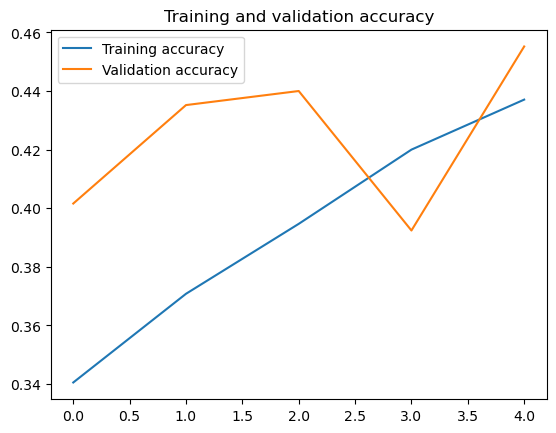

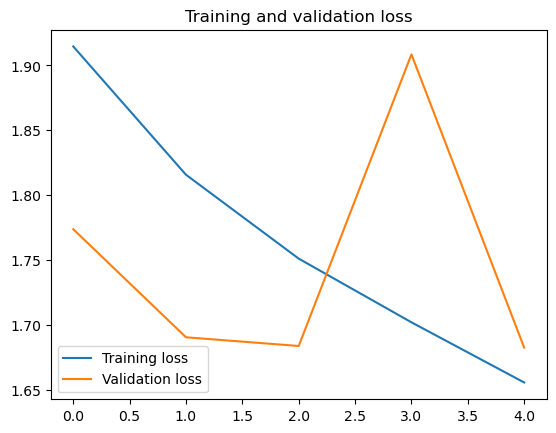

In [18]:
plot_history(history_3)

### 7. Lặp lại cho đến khi thoả mãn

==================================================

# Learning Rate

In [19]:
history_4 = model2.fit(train_data_augmented, 
                       epochs=5, 
                       steps_per_epoch=len(train_data_augmented), 
                       validation_data=val_data, 
                       validation_steps=len(val_data), 
                       callbacks=[
                           tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
                       ])


Epoch 1/5
235/235 [==============================] - 233s 989ms/step - loss: 1.5424 - accuracy: 0.4805 - val_loss: 1.6540 - val_accuracy: 0.4644 - lr: 1.0000e-04
Epoch 2/5
235/235 [==============================] - 238s 1s/step - loss: 1.5115 - accuracy: 0.4905 - val_loss: 1.7151 - val_accuracy: 0.4616 - lr: 1.1220e-04
Epoch 3/5
235/235 [==============================] - 230s 976ms/step - loss: 1.4859 - accuracy: 0.5024 - val_loss: 1.7042 - val_accuracy: 0.4600 - lr: 1.2589e-04
Epoch 4/5
235/235 [==============================] - 228s 967ms/step - loss: 1.4876 - accuracy: 0.4983 - val_loss: 1.6125 - val_accuracy: 0.4824 - lr: 1.4125e-04
Epoch 5/5
235/235 [==============================] - 231s 980ms/step - loss: 1.4687 - accuracy: 0.5040 - val_loss: 1.6981 - val_accuracy: 0.4592 - lr: 1.5849e-04


In [20]:
def plot_history_learning_rate(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    lr = history.history["lr"]
    
    
    epochs = range(len(history.history["accuracy"]))
    
    plt.plot(epochs, acc, label="Training accuracy")
    plt.plot(epochs, val_acc, label="Validation accuracy")
    plt.plot(epochs, lr, label="Learning rate")
    plt.title("Training and validation accuracy")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.plot(epochs, lr, label="Learning rate")
    plt.title("Training and validation loss")
    plt.legend()

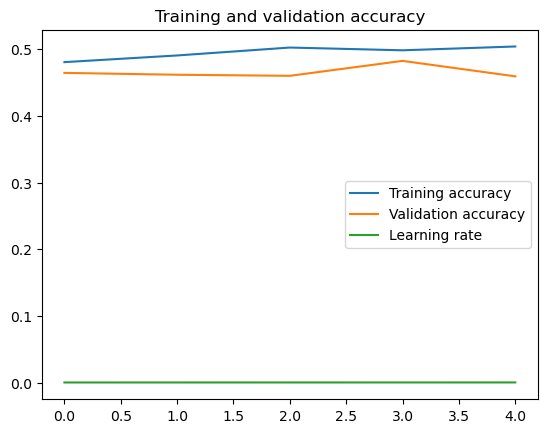

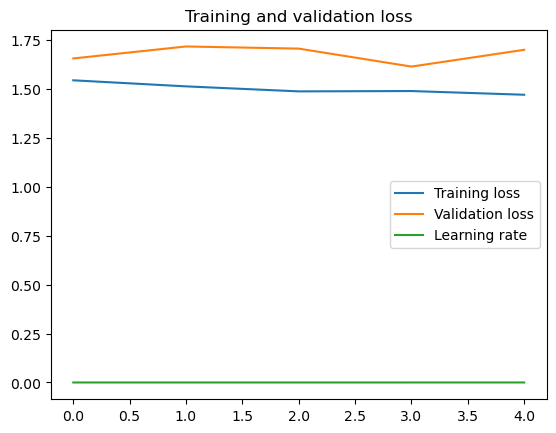

In [21]:
plot_history_learning_rate(history_4)